# Exploration.Gn03

## 가위, 바위, 보 이미지 분류하는 딥러닝 모델 만들기

# 이미지 불러오기

In [1]:
img_sz = 30

In [2]:
from PIL import Image
import glob

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 30x30 사이즈로 바꾸어 저장합니다.
    target_size=(img_sz,img_sz)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'rock_scissors_paper/scissors5'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

In [4]:
image_dir_path = 'rock_scissors_paper/rock5'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

In [5]:
image_dir_path = 'rock_scissors_paper/paper5'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

## train셋 만들기

In [6]:
import numpy as np

def load_data(img_path, number_of_data=9900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=img_sz
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors5/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock5/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper5/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = 'rock_scissors_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 9900 입니다.
x_train shape: (9900, 30, 30, 3)
y_train shape: (9900,)


라벨:  0


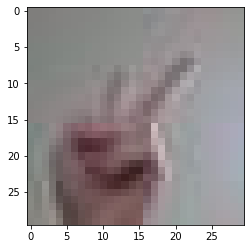

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[111])
print('라벨: ', y_train[111])

## 모델 만들기

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_sz,img_sz,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  9


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

## 모델 학습 시키기

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=30)

Epoch 1/30
310/310 [==============================] - 4s 11ms/step - loss: 0.3935 - accuracy: 0.8294
Epoch 2/30
310/310 [==============================] - 3s 10ms/step - loss: 0.0340 - accuracy: 0.9922
Epoch 3/30
310/310 [==============================] - 3s 10ms/step - loss: 0.0051 - accuracy: 0.9995
Epoch 4/30
310/310 [==============================] - 3s 10ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 5/30
310/310 [==============================] - 3s 10ms/step - loss: 8.6419e-04 - accuracy: 1.0000
Epoch 6/30
310/310 [==============================] - 3s 10ms/step - loss: 0.0044 - accuracy: 0.9987
Epoch 7/30
310/310 [==============================] - 3s 10ms/step - loss: 3.8035e-04 - accuracy: 1.0000
Epoch 8/30
310/310 [==============================] - 3s 10ms/step - loss: 1.5292e-04 - accuracy: 1.0000
Epoch 9/30
310/310 [==============================] - 3s 10ms/step - loss: 1.0648e-04 - accuracy: 1.0000
Epoch 10/30
310/310 [==============================] - 3s 9ms/step - loss: 

## test셋 만들기

In [12]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 30x30 사이즈로 바꾸어 저장합니다.
    target_size=(img_sz,img_sz)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'rock_scissors_paper/test5/scissors'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

In [13]:
image_dir_path = 'rock_scissors_paper/test5/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

In [14]:
image_dir_path = 'rock_scissors_paper/test5/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

In [15]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=img_sz
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = 'rock_scissors_paper/test5'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 30, 30, 3)
y_test shape: (300,)


## 테스트 정확도 체크

In [16]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.6137 - accuracy: 0.6100 - 142ms/epoch - 14ms/step
test_loss: 2.613659620285034 
test_accuracy: 0.6100000143051147


### - 최종 test_accuracy는 약 **61%**가 나옴

## Version1에서 했던 것
- 이미지 크기 : (100, 100)
- train : test의 이미지 갯수 = train 300개 : test 300개
- optimizer를 변경하면서 test_accuaracy 측정
    - optimizer : 'SGD', 'Adam', 'Nadam', 'AdaMax', 'RMSProp'
- 얻은 교훈
    - 때로는 RMSProp 성능이 좋게 나타남
    - 대체로 Adam의 성능이 좋게 나타났음

## Version2에서 했던 것
- train 이미지 갯수를 늘림 (train 900개, test 300개)
 - train 이미지 갯수는 총 4명의 사진으로 얻음
- 첫번째 Conv2D : 16, 두번째 Conv2D : 32, Dense : 32의 볼륨을 해당 수치만큼 고정
- epoch와 이미지 사이즈를 변경하면서 test_accuracy 측정

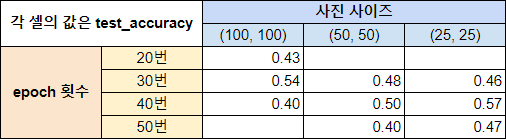

- 사진 사이즈가 (25,25)이고 epoch가 40번일 때는 우연에 의한 수치임
- 얻은 교훈 
    - epoch 변경만으로는 test_accuracy를 올리는데 한계가 있음
    - epoch가 너무 높으면 성능이 떨어지기도 함 (Overfitting이라고 판단됨)
    - 똑같은 파라미터 수치를 가져도 실행할 때마다 다른 결과값을 얻음

## Version3에서 했던 것
- 이미지 사이즈를 (25, 25)과 (100, 100) 두 가지를 비교
- train 이미지 갯수를 늘림 (train 900개, test 300개)
    - train 이미지 갯수는 총 4명의 사진으로 얻음
- 첫 번째 Conv2D, 두 번째 Conv2D, Dense, epoch의 값을 변경해보면서 비교
    - 각 값은 난수로 뽑아냈음
- 얻은 교훈 : 이미지 크기, Conv2D, Maxpooling, epoch의 값이 서로 결과에 영향을 주기 때문에 원인을 파악하기 어려움

## Version4에서 했던 것
- train 이미지 갯수를 늘림 (train 9,900개, test 300개)
    - train 이미지 갯수는 각 3방향에서 혼자 찍어 얻음
- 이미지 사이즈를 (28, 28)과 (100, 100) 두가지로 고정
- 첫 번째 Conv2D, 두 번째 Conv2D, Dense, epoch의 값을 변경해보면서 비교

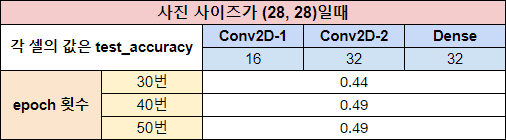

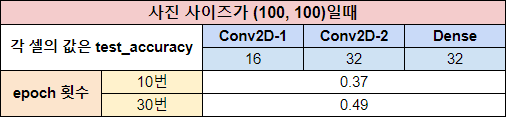

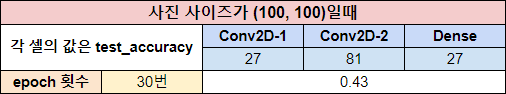

- 얻은 교훈
    - 이미지 크기가 크고 train 갯수가 많은 상태에서 레이어의 볼륨을 높이면 시간 소모가 커짐

## Version5에서 했던 것
- Conv2D와 Maxpooling2D 층을 하나씩 더 추가함
- train 이미지 갯수 : 9,900개, test 이미지 갯수 : 300개
    - train 이미지 갯수는 각 3방향에서 혼자 찍어 얻음
- 이미지 사이즈는 (30, 30)으로 고정
- 첫 번째 Conv2D, 두 번째 Conv2D, 세 번째 Conv2D, Dense의 볼륨을 변경하면서 test_accuracy 측정
- epoch 횟수를 변경하면서 test_accuracy 측정

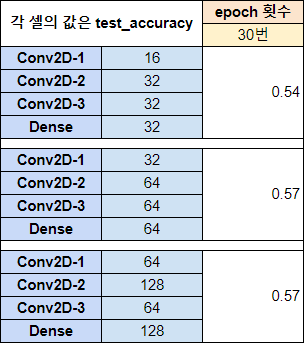

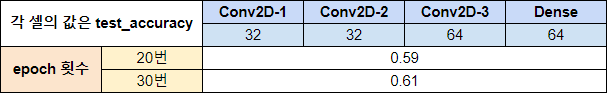